<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Correlation-for-Numerical-variable" data-toc-modified-id="Correlation-for-Numerical-variable-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Correlation for Numerical variable</a></span></li><li><span><a href="#Association-between-Categorical-Variable" data-toc-modified-id="Association-between-Categorical-Variable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Association between Categorical Variable</a></span></li><li><span><a href="#Indiustry-Column" data-toc-modified-id="Indiustry-Column-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Indiustry Column</a></span></li><li><span><a href="#Continuous-columns" data-toc-modified-id="Continuous-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Continuous columns</a></span></li><li><span><a href="#fill-Null-value-by-'Other'" data-toc-modified-id="fill-Null-value-by-'Other'-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>fill Null value by 'Other'</a></span></li><li><span><a href="#Designation" data-toc-modified-id="Designation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Designation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Showing-there-is-no-strong-association-between-categorical-variables" data-toc-modified-id="Showing-there-is-no-strong-association-between-categorical-variables-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Showing there is no strong association between categorical variables</a></span></li><li><span><a href="#We-can-consider-null-value-as-the-category" data-toc-modified-id="We-can-consider-null-value-as-the-category-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>We can consider null value as the category</a></span></li></ul></li></ul></li><li><span><a href="#Working-on-Target-variable" data-toc-modified-id="Working-on-Target-variable-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Working on Target variable</a></span></li><li><span><a href="#Internal-Rating/Outlier-Removal" data-toc-modified-id="Internal-Rating/Outlier-Removal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Internal Rating/Outlier Removal</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Encoding</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train_MSE" data-toc-modified-id="Train_MSE-9.0.1"><span class="toc-item-num">9.0.1&nbsp;&nbsp;</span>Train_MSE</a></span></li><li><span><a href="#Train_MSE" data-toc-modified-id="Train_MSE-9.0.2"><span class="toc-item-num">9.0.2&nbsp;&nbsp;</span>Train_MSE</a></span></li></ul></li></ul></li><li><span><a href="#Validation-of-the-model" data-toc-modified-id="Validation-of-the-model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Validation of the model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-10.0.1"><span class="toc-item-num">10.0.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#XGBOOst" data-toc-modified-id="XGBOOst-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>XGBOOst</a></span><ul class="toc-item"><li><span><a href="#Train_MSE" data-toc-modified-id="Train_MSE-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Train_MSE</a></span></li></ul></li></ul></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Save-the-Pickel-Encoder" data-toc-modified-id="Save-the-Pickel-Encoder-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Save the Pickel Encoder</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train_MSE" data-toc-modified-id="Train_MSE-12.0.1"><span class="toc-item-num">12.0.1&nbsp;&nbsp;</span>Train_MSE</a></span></li></ul></li></ul></li></ul></div>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score
from scipy import stats as ss
from scipy.stats import chi2_contingency,fisher_exact
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
from xgboost import XGBRegressor 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.tree import DecisionTreeRegressor

# Importing data

In [2]:
Train=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\SB\f167b0fc922411eb\dataset\train.csv")
Test=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\SB\f167b0fc922411eb\dataset\test.csv")
df=pd.concat([Train,Test])


In [3]:
print(df.head())

   Deal_title                      Lead_name               Industry   
0  TitleM5DZY  Davis, Perkins and Bishop Inc            Restaurants  \
1  TitleKIW18                 Bender PLC LLC  Construction Services   
2  TitleFXSDN          Carter-Henry and Sons      Hospitals/Clinics   
3  TitlePSK4Y                 Garcia Ltd Ltd            Real Estate   
4  Title904GV               Lee and Sons PLC     Financial Services   

  Deal_value Weighted_amount Date_of_creation      Pitch   
0    320506$      2067263.7$       2020-03-29  Product_2  \
1     39488$       240876.8$       2019-07-10  Product_2   
2    359392$      2407926.4$       2019-07-27  Product_1   
3     76774$       468321.4$       2021-01-30  Product_2   
4    483896$             NaN       2019-05-22  Product_2   

             Contact_no             Lead_revenue Fund_category  ...   
0          607.447.7883         50 - 100 Million    Category 2  ...  \
1          892-938-9493  500 Million - 1 Billion    Category 4  ...   

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9100 entries, 0 to 2092
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             9100 non-null   object 
 1   Lead_name              9100 non-null   object 
 2   Industry               9098 non-null   object 
 3   Deal_value             9044 non-null   object 
 4   Weighted_amount        8515 non-null   object 
 5   Date_of_creation       9100 non-null   object 
 6   Pitch                  9100 non-null   object 
 7   Contact_no             9100 non-null   object 
 8   Lead_revenue           9100 non-null   object 
 9   Fund_category          9100 non-null   object 
 10  Geography              8049 non-null   object 
 11  Location               9086 non-null   object 
 12  POC_name               9090 non-null   object 
 13  Designation            9100 non-null   object 
 14  Lead_POC_email         9100 non-null   object 
 15  Hiring_ca

In [5]:
df.isnull().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
dtype: int64

In [6]:
df.describe()

,Internal_rating,Success_probability
count,9100.000000,7007.000000
mean,3.040334,64.745133
std,2.496050,17.931635
min,-1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,82.340000,107.340000


In [7]:
df.isnull().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
dtype: int64

In [8]:
df.Deal_title.unique()

array(['TitleM5DZY', 'TitleKIW18', 'TitleFXSDN', ..., 'TitleCD5YZ',
       'Title8OKXL', 'TitleHFQT8'], dtype=object)

In [9]:
df.nunique()

Deal_title               9100
Lead_name                9100
Industry                  172
Deal_value               8967
Weighted_amount          8513
Date_of_creation          777
Pitch                       2
Contact_no               9100
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 6633
Designation                10
Lead_POC_email           9099
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
Success_probability       248
dtype: int64

In [10]:
df['Deal_value'] = df['Deal_value'].replace('[$,]', '', regex=True).astype(float, errors='ignore')

In [11]:
df['Weighted_amount']=df['Weighted_amount'].replace('[$,]','',regex=True).astype(float,errors='ignore')

In [12]:
df['Deal_value']=df['Deal_value'].astype(float)

In [13]:
df['Weighted_amount']=df['Weighted_amount'].astype(float)

In [14]:
df.describe()

,Deal_value,Weighted_amount,Internal_rating,Success_probability
count,9044.000000,8.515000e+03,9100.000000,7007.000000
mean,249285.734078,1.566788e+06,3.040334,64.745133
std,144127.718135,9.165324e+05,2.496050,17.931635
min,1551.000000,8.708000e+03,-1.000000,-5.000000
25%,122991.250000,7.747353e+05,2.000000,60.600000
50%,247957.000000,1.552888e+06,3.000000,65.300000
75%,375166.000000,2.351754e+06,4.000000,69.600000
max,500000.000000,3.601416e+06,82.340000,107.340000


# Graphs

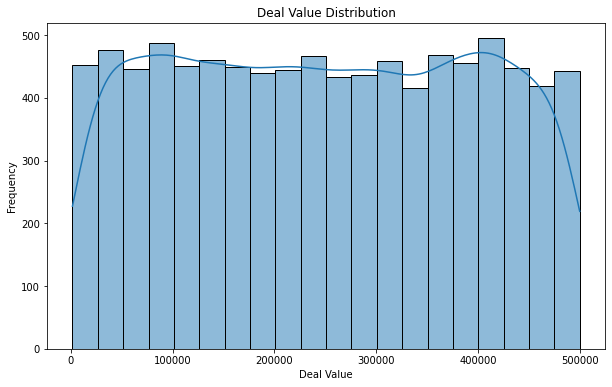

In [15]:
# Plot 1: Deal Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Deal_value'], bins=20, kde=True)
plt.title('Deal Value Distribution')
plt.xlabel('Deal Value')
plt.ylabel('Frequency')
plt.show()






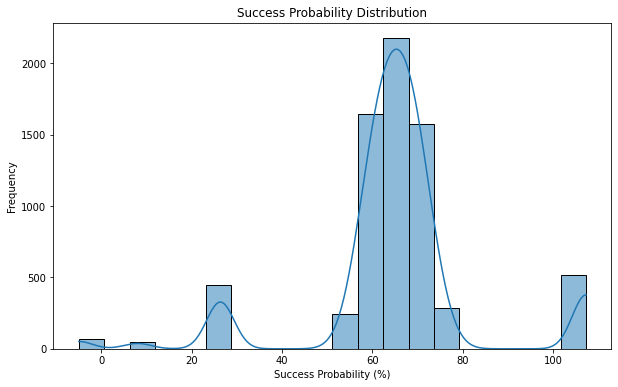

In [16]:
# Plot 3: Success Probability Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Success_probability'], bins=20, kde=True)
plt.title('Success Probability Distribution')
plt.xlabel('Success Probability (%)')
plt.ylabel('Frequency')
plt.show()

## Correlation for Numerical variable

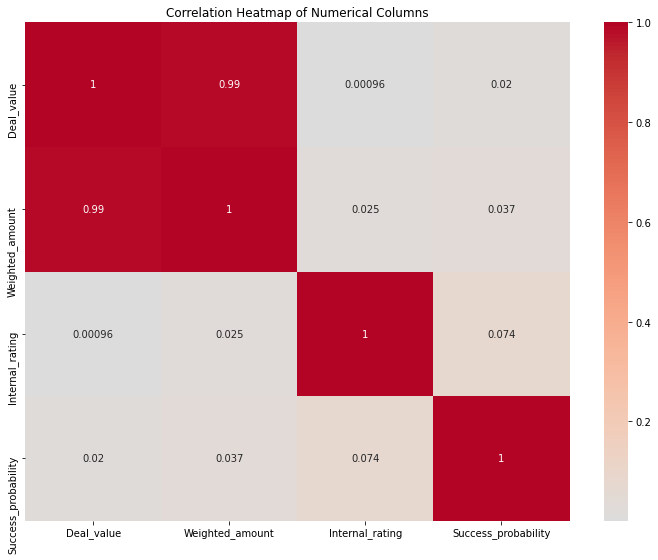

In [17]:
numeric_columns = ['Deal_value', 'Weighted_amount', 'Internal_rating', 'Success_probability']

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

## Association between Categorical Variable

In [18]:
"""H0: There is no association between categories
    Reject when p<0.05
    Accept when p>0.05
""" 

'H0: There is no association between categories\n    Reject when p<0.05\n    Accept when p>0.05\n'

In [19]:
categorical = ['Industry', 'Pitch', 'Lead_revenue', 'Fund_category', 'Geography',
               'Location', 'Designation', 'Hiring_candidate_role', 'Last_lead_update',
               'Lead_source', 'Level_of_meeting', 'Internal_POC', 'Resource']

l1=categorical
l2=categorical
cat_var_product=list(product(l1,l2,repeat=1))

result=[]
for i in cat_var_product:
    if i[0]!=i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df[i[0]],df[i[1]])))[1]))

chi_sq_output=pd.DataFrame(result,columns=['l1','l2','p_value'])
chi_sq_output.head()

print('Given tables shows the pvalue corresponding two categorical variables')
chi_sq_output.pivot(index='l1',columns='l2',values='p_value')


Given tables shows the pvalue corresponding two categorical variables


l2,Designation,Fund_category,Geography,Hiring_candidate_role,Industry,Internal_POC,Last_lead_update,Lead_revenue,Lead_source,Level_of_meeting,Location,Pitch,Resource
l1,,,,,,,,,,,,,
Designation,NaN,0.152400,0.694509,0.718301,0.706021,0.522777,0.381183,0.166192,0.555827,0.147553,0.124841,0.331303,0.398705
Fund_category,0.152400,NaN,0.932256,0.536924,0.437522,0.364406,0.152903,0.860146,0.392396,0.521220,0.692017,0.652024,0.517222
Geography,0.694509,0.932256,NaN,0.521117,0.489847,0.852668,0.985622,0.371726,0.909119,0.905550,0.000000,0.866960,0.767822
Hiring_candidate_role,0.718301,0.536924,0.521117,NaN,0.150513,0.635542,0.734160,0.976611,0.942831,0.870533,0.638509,0.266328,0.407194
Industry,0.706021,0.437522,0.489847,0.150513,NaN,0.690518,0.276287,0.750088,0.405958,0.921570,0.000439,0.177484,0.181060
Internal_POC,0.522777,0.364406,0.852668,0.635542,0.690518,NaN,0.898233,0.477365,0.006594,0.083620,0.149404,0.823648,0.894462
Last_lead_update,0.381183,0.152903,0.985622,0.734160,0.276287,0.898233,NaN,0.566634,0.866919,0.431041,0.233743,0.096617,0.200665
Lead_revenue,0.166192,0.860146,0.371726,0.976611,0.750088,0.477365,0.566634,NaN,0.610515,0.179370,0.321134,0.381608,0.163059
Lead_source,0.555827,0.392396,0.909119,0.942831,0.405958,0.006594,0.866919,0.610515,NaN,0.313785,0.719848,0.321328,0.285363


In [20]:
df

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.70,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.80,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.40,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.40,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2732332.50,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,Category 3,...,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,Level 3,No track,"Ross,Eric L",No,1.0,NaN
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2956399.05,2019-10-20,Product_2,1377254815,50 - 100 Million,Category 3,...,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,Level 2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0,NaN
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2631993.75,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,Category 1,...,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,Level 1,?,"Bannister,Joan",Deliverable,5.0,NaN
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,350292.15,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,Category 2,...,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,Level 1,NaN,"Murray,Younetta",We have all the requirements,5.0,NaN


In [21]:
df1=df.drop(['Deal_title','Date_of_creation','Contact_no','Lead_name','Lead_POC_email','POC_name'],axis=1)

In [22]:
df1.columns
print(df.columns.shape)

(23,)


In [23]:
df1.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,Restaurants,320506.0,2067263.7,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6
1,Construction Services,39488.0,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9
2,Hospitals/Clinics,359392.0,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8
3,Real Estate,76774.0,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5
4,Financial Services,483896.0,NaN,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4


# Missing values

In [24]:
df1.isnull().mean()*100 

Industry                  0.021978
Deal_value                0.615385
Weighted_amount           6.428571
Pitch                     0.000000
Lead_revenue              0.000000
Fund_category             0.000000
Geography                11.549451
Location                  0.153846
Designation               0.000000
Hiring_candidate_role     0.000000
Lead_source               0.000000
Level_of_meeting          0.000000
Last_lead_update          8.802198
Internal_POC              0.000000
Resource                  1.791209
Internal_rating           0.000000
Success_probability      23.000000
dtype: float64

## Indiustry Column

In [25]:
df1.dropna(subset=['Industry'], inplace=True)

In [26]:
df1.isnull().sum()

Industry                    0
Deal_value                 56
Weighted_amount           585
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2092
dtype: int64

## Continuous columns

In [27]:

imputer=SimpleImputer(strategy='mean')

In [28]:
df1['Deal_value']=imputer.fit_transform(df1[['Deal_value']])
df1['Weighted_amount']=imputer.fit_transform(df1[['Weighted_amount']])

In [29]:
df1.isnull().sum()

Industry                    0
Deal_value                  0
Weighted_amount             0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2092
dtype: int64

## fill Null value by 'Other'

In [30]:
df1.Geography.mode()

0    USA
Name: Geography, dtype: object

In [31]:
df1['Last_lead_update'].fillna('other', inplace=True)
df1['Resource'].fillna('other', inplace=True)
df1['Geography'].fillna('USA',inplace=True)

In [32]:
#Replace'?' with the pending status
df1['Last_lead_update'] = df1['Last_lead_update'].replace('?', 'Pending')


In [33]:
df1.isnull().sum()

Industry                    0
Deal_value                  0
Weighted_amount             0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                   0
Location                   14
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update            0
Internal_POC                0
Resource                    0
Internal_rating             0
Success_probability      2092
dtype: int64

In [34]:
set([i for i in df1.Last_lead_update ])

{'2 days back',
 '5 days back',
 'Did not hear back after Level 1',
 'Following up but lead not responding',
 'More than 2 weeks',
 'More than a week back',
 'No track',
 'Pending',
 'Up-to-date',
 'more than a month',
 'other'}

In [35]:
df1['Resource'].unique()

array(['other', 'No', 'We have all the requirements', 'Deliverable',
       'Cannot deliver', 'Not enough', 'Yes'], dtype=object)

In [36]:
df1.isnull().sum()

Industry                    0
Deal_value                  0
Weighted_amount             0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                   0
Location                   14
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update            0
Internal_POC                0
Resource                    0
Internal_rating             0
Success_probability      2092
dtype: int64

## Designation

In [37]:
df.Designation.value_counts()

Designation
CEO                                                                  942
Chairman/CEO/President                                               935
CEO/Co-Founder/Chairman                                              930
CEO/Chairman/President                                               928
SVP/General Counsel                                                  926
Executive Vice President                                             918
Vice President / GM (04-present) : VP Sales and Marketing (01-04)    898
Chairman/Chief Innovation Officer                                    884
Chief Executive Officer                                              871
CEO/President                                                        868
Name: count, dtype: int64

In [38]:
df1['Designation']=df1['Designation'].apply(lambda x: x.split('/')[0])

In [39]:
 df1.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating',
       'Success_probability'],
      dtype='object')

#### Showing there is no strong association between categorical variables
1. Location and geography showing the association so we will keep geographi
2. Location and Industry showing the association so we will keep Industry
3. Level of meeting and desgnation also have association


#### We can consider null value as the category

## Working on Target variable

In [40]:
df1['Success_probability'].isnull().sum()

2092

In [41]:
#df['Success_probability'].fillna(df['Success_probability'].mean(),inplace=True)

In [42]:
df1.isnull().sum()


Industry                    0
Deal_value                  0
Weighted_amount             0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                   0
Location                   14
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update            0
Internal_POC                0
Resource                    0
Internal_rating             0
Success_probability      2092
dtype: int64

In [43]:
df1['Success_probability']=df1['Success_probability'].apply(lambda x:x/100)

In [44]:
df1.Success_probability.describe()

count    7006.000000
mean        0.647463
std         0.179327
min        -0.050000
25%         0.606000
50%         0.653000
75%         0.696000
max         1.073400
Name: Success_probability, dtype: float64

In [45]:
df1.shape


(9098, 17)

In [46]:
df1=df1[~(df1['Success_probability']<0) | (df1['Success_probability']>1)]


In [47]:
df1.dropna(subset=['Success_probability'], inplace=True)

In [48]:
df1.isnull().sum()

Industry                  0
Deal_value                0
Weighted_amount           0
Pitch                     0
Lead_revenue              0
Fund_category             0
Geography                 0
Location                 11
Designation               0
Hiring_candidate_role     0
Lead_source               0
Level_of_meeting          0
Last_lead_update          0
Internal_POC              0
Resource                  0
Internal_rating           0
Success_probability       0
dtype: int64

## Internal Rating/Outlier Removal

In [49]:
df1=df1[~(df1.Internal_rating==82.34)] #Remove outlier

In [50]:
df1.Internal_rating.unique()

array([3., 5., 4., 1., 2.])

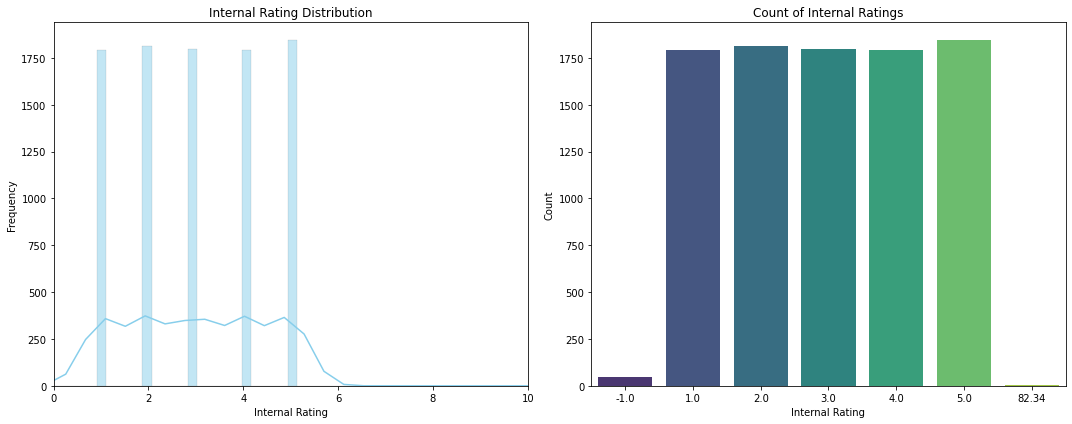

In [51]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Internal Rating Distribution (Histogram)
sns.histplot(df['Internal_rating'].dropna(), kde=True, color='skyblue', ax=axes[0])
axes[0].set_xlim(0, 10)
axes[0].set_title('Internal Rating Distribution')
axes[0].set_xlabel('Internal Rating')
axes[0].set_ylabel('Frequency')

# Plot 2: Count of Internal Ratings
sns.countplot(x='Internal_rating', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Count of Internal Ratings')
axes[1].set_xlabel('Internal Rating')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [52]:
df1.nunique()

Industry                  171
Deal_value               6837
Weighted_amount          6413
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
Success_probability       247
dtype: int64

In [53]:
df1.Internal_rating.unique()

array([3., 5., 4., 1., 2.])

In [54]:
df4=df1.copy()

In [55]:
df4

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,Restaurants,320506.0,2.067264e+06,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",other,3.0,0.7360
1,Construction Services,39488.0,2.408768e+05,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,0.5890
2,Hospitals/Clinics,359392.0,2.407926e+06,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP,Health service manager,Marketing Event,Level 1,Pending,"Georgakopoulos,Vasilios T",No,4.0,0.6880
3,Real Estate,76774.0,4.683214e+05,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,0.6450
4,Financial Services,483896.0,1.566916e+06,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,0.6240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,Banks,479541.0,2.685430e+06,Product_1,100 - 500 Million,Category 3,India,Nellore,CEO,Systems analyst,Others,Level 2,Pending,"Morsy,Omar A",other,2.0,0.5740
7002,Banks,192800.0,1.195360e+06,Product_1,100 - 500 Million,Category 4,USA,Kagaznagar,CEO,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,4.0,1.0734
7003,Hospitals/Clinics,220208.0,1.453373e+06,Product_2,100 - 500 Million,Category 1,USA,Proddatur,CEO,Financial risk analyst,Marketing Event,Level 2,Pending,"Brown,Maxine A",We have all the requirements,3.0,0.2635
7004,Semiconductors,253608.0,1.566916e+06,Product_1,100 - 500 Million,Category 2,USA,"Rocky Mount, NC",SVP,Nature conservation officer,Marketing Event,Level 3,other,"Logan,Kevin N",other,1.0,0.7060


In [56]:
  #will use for the final model

## Encoding

In [57]:
df1.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating',
       'Success_probability'],
      dtype='object')

In [58]:
df1.isnull().sum()

Industry                  0
Deal_value                0
Weighted_amount           0
Pitch                     0
Lead_revenue              0
Fund_category             0
Geography                 0
Location                 11
Designation               0
Hiring_candidate_role     0
Lead_source               0
Level_of_meeting          0
Last_lead_update          0
Internal_POC              0
Resource                  0
Internal_rating           0
Success_probability       0
dtype: int64

In [59]:
df1.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating',
       'Success_probability'],
      dtype='object')

In [60]:
# Encode categorical features using label encoding
label_encoders = {}
categorical_columns = ['Industry','Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating']
for col in categorical_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [61]:
df1.nunique()

Industry                  171
Deal_value               6837
Weighted_amount          6413
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  598
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
Success_probability       247
dtype: int64

In [62]:
df1.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

In [63]:
#df.dropna(inplace=True)

In [64]:
import sklearn
print(sklearn.__version__)

1.3.1


# Bivariate Analysis

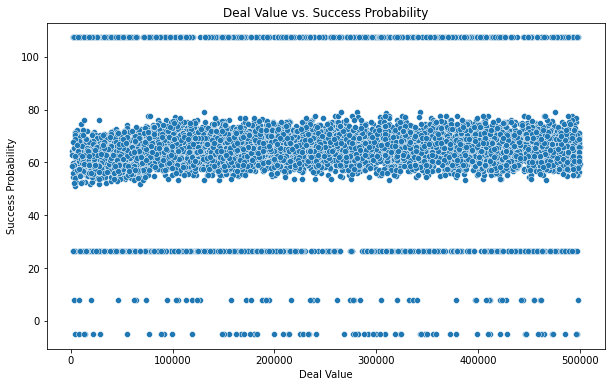

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Deal_value', y='Success_probability', data=df)
plt.title('Deal Value vs. Success Probability')
plt.xlabel('Deal Value')
plt.ylabel('Success Probability')
plt.show()

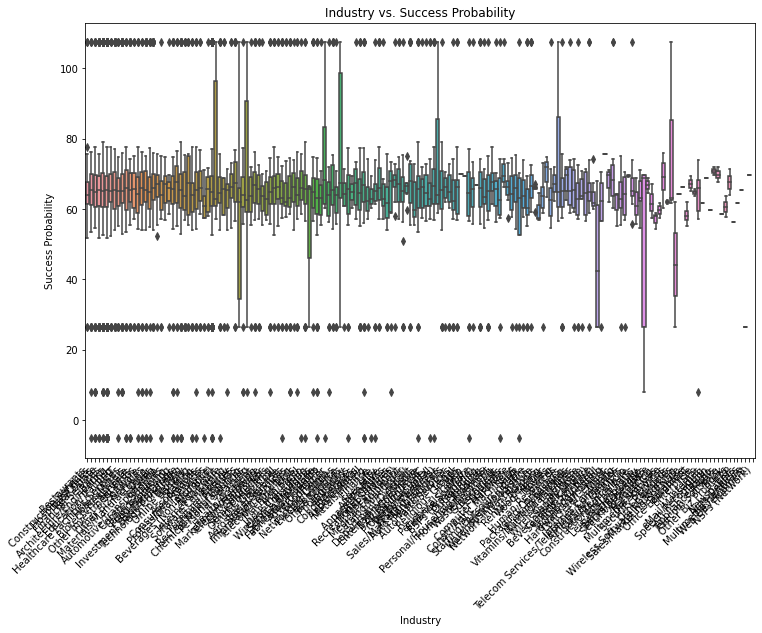

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry', y='Success_probability', data=df)
plt.title('Industry vs. Success Probability')
plt.xlabel('Industry')
plt.ylabel('Success Probability')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


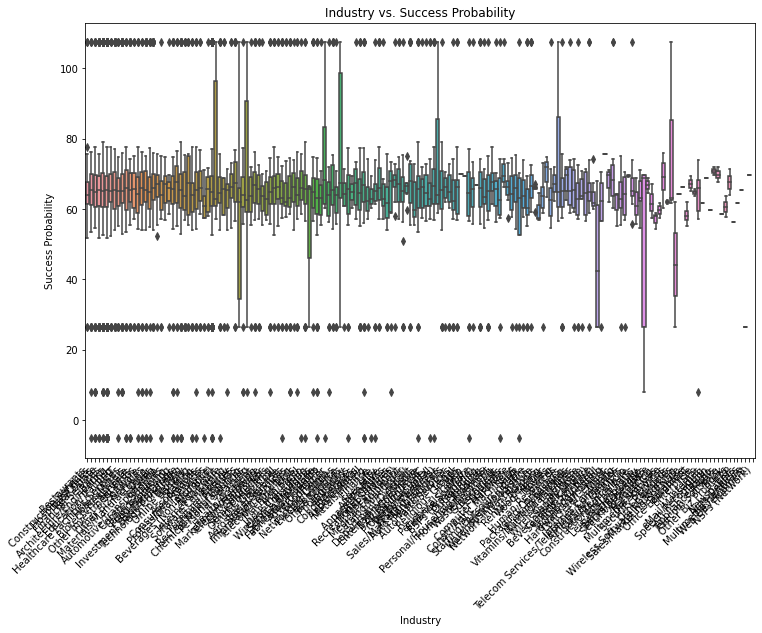

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry', y='Success_probability', data=df)
plt.title('Industry vs. Success Probability')
plt.xlabel('Industry')
plt.ylabel('Success Probability')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Model Building

In [68]:
df1.shape

(6936, 17)

In [69]:
df1.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating',
       'Success_probability'],
      dtype='object')

In [70]:
df1.nunique()

Industry                  171
Deal_value               6837
Weighted_amount          6413
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  598
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
Success_probability       247
dtype: int64

In [71]:
df1.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

In [72]:
df1.shape

(6936, 17)

In [73]:
df1.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

In [74]:
df1.nunique()

Industry                  171
Deal_value               6837
Weighted_amount          6413
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  598
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
Success_probability       247
dtype: int64

In [199]:
x=df1.drop(['Success_probability'],axis=1)

In [200]:
y=df1[['Success_probability']]

In [201]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [202]:
X_train.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating'],
      dtype='object')

In [131]:
df1.nunique()

Industry                  171
Deal_value               6837
Weighted_amount          6413
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  598
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
Success_probability       247
dtype: int64

In [132]:
X_train.nunique()

Industry                  168
Deal_value               5481
Weighted_amount          5128
Pitch                       2
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  598
Designation                 6
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    7
Internal_rating             5
dtype: int64

In [133]:
X_train.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
4181,140,246985.0,1691847.25,0,2,3,1,588,0,494,2,2,7,12,4,2
5305,94,142632.0,934239.60,1,2,1,1,507,0,156,1,2,6,42,5,0
1773,17,207276.0,1233292.20,1,0,2,0,576,3,178,3,0,3,5,3,2
5063,31,440581.0,2577398.85,0,1,2,1,269,2,610,1,0,6,13,0,0
2695,17,325372.0,2082380.80,1,0,2,1,403,0,336,1,1,2,9,1,2


# Decision Tree

In [134]:
DTR_model=DecisionTreeRegressor()

In [135]:
DTR_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [140]:
pred=DTR_model.predict(X_test)
pred_train=DTR_model.predict(X_train)

#### Train_MSE

In [141]:
mean_squared_error(y_train,pred_train)

7.331586233860566e-35

In [137]:
E1=mean_absolute_error(y_test,pred);E1

E2=mean_squared_error(y_test,pred);E2

E3=mean_absolute_percentage_error(y_test,pred);E3


0.31117319541405764

In [138]:
def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)

,Error,Value
0,mean_absolute_error,0.141594
1,mean_squared_error,0.058409
2,mean_absolute_percentage_error,0.311173


# Random Forest

In [203]:
print('Train_Size:',X_train.shape)
print('Test_Size:',X_test.shape)


Train_Size: (5548, 16)
Test_Size: (1388, 16)


In [204]:
Regressor=RandomForestRegressor()

In [205]:
Regressor.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [206]:
predicted=Regressor.predict(X_test)

In [207]:
r2_score(y_train,Regressor.predict(X_train))

0.8587445109840776

#### Train_MSE

In [208]:
mean_squared_error(y_train,Regressor.predict(X_train))

0.0038176401776877983

In [209]:
E11=mean_absolute_error(y_test,predicted);E11

E21=mean_squared_error(y_test,predicted);E21

E31=mean_absolute_percentage_error(y_test,predicted);E31

0.24476996097023607

In [148]:
Error(E11,E21,E31)

,Error,Value
0,mean_absolute_error,0.091168
1,mean_squared_error,0.029238
2,mean_absolute_percentage_error,0.242749


## Validation of the model

In [152]:
def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             }) 
    return Err

In [153]:
Error(E1,E2,E3)

,Error,Value
0,mean_absolute_error,0.141594
1,mean_squared_error,0.058409
2,mean_absolute_percentage_error,0.311173


In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_random.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-packages\skle

Best Hyperparameters: {'n_estimators': 136, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Mean Squared Error on Test Set: 0.02840383948947933


#### Feature Importance

In [158]:
# Get feature importances
feature_importances =Regressor.feature_importances_

# Assuming your original feature names are in X_train.columns
feature_names = X_train.columns

# Sort indices by importance
sorted_indices = np.argsort(feature_importances)

# Create a DataFrame with original feature names and their importance values
feature_importance_df = pd.DataFrame(
    {'Feature': np.array(feature_names)[sorted_indices],
     'Importance': feature_importances[sorted_indices]}
)
feature_importance_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
15,Location,0.129909
14,Hiring_candidate_role,0.122046
13,Deal_value,0.106904
12,Internal_POC,0.102830
11,Weighted_amount,0.099209
10,Industry,0.091064
9,Last_lead_update,0.056875
8,Resource,0.049756
7,Internal_rating,0.039522
6,Designation,0.039416


"""Deal_title               9100
Lead_name                9100
Industry                  172
Deal_value               8967
Weighted_amount          8513
Date_of_creation          777
Pitch                       2
Contact_no               9100
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 6633
Designation                10
Lead_POC_email           9099
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
Success_probability       248
dtype: int64"""

In [155]:
X_train.columns

Index(['Industry', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'Designation',
       'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting',
       'Last_lead_update', 'Internal_POC', 'Resource', 'Internal_rating'],
      dtype='object')

### XGBOOst

In [159]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [160]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [161]:
predicted2=xgb_model.predict(X_test)

In [162]:
E1=mean_absolute_error(y_test,predicted2);E1 

E2=mean_squared_error(y_test,predicted2);E2

E3=mean_absolute_percentage_error(y_test,predicted2);E3

0.27405311306223334

#### Train_MSE

In [164]:
mean_squared_error(y_train,Regressor.predict(X_train))

0.00385671304270474

In [165]:
r2_score(y_train,xgb_model.predict(X_train))

0.8265118729302079

In [166]:
Error(E1,E2,E3)

,Error,Value
0,mean_absolute_error,0.110507
1,mean_squared_error,0.032812
2,mean_absolute_percentage_error,0.274053


# Final_model

In [167]:
'''Chooosed Columns for final model
df2=df4[['Industry','Deal_value','Weighted_amount','Fund_category','Geography', 
'Designation','Resource','Last_lead_update','Internal_rating','Success_probability']]
'''

"Chooosed Columns for final model\ndf2=df4[['Industry','Deal_value','Weighted_amount','Fund_category','Geography', \n'Designation','Resource','Last_lead_update','Internal_rating','Success_probability']]\n"

In [168]:
df2=df4[['Industry','Deal_value','Weighted_amount','Fund_category','Geography', 'Designation','Resource','Last_lead_update','Internal_rating','Success_probability']]

In [169]:
df2

,Industry,Deal_value,Weighted_amount,Fund_category,Geography,Designation,Resource,Last_lead_update,Internal_rating,Success_probability
0,Restaurants,320506.0,2.067264e+06,Category 2,USA,Executive Vice President,other,No track,3.0,0.7360
1,Construction Services,39488.0,2.408768e+05,Category 4,India,Chairman,No,Did not hear back after Level 1,5.0,0.5890
2,Hospitals/Clinics,359392.0,2.407926e+06,Category 4,USA,SVP,No,Pending,4.0,0.6880
3,Real Estate,76774.0,4.683214e+05,Category 3,USA,CEO,We have all the requirements,Did not hear back after Level 1,1.0,0.6450
4,Financial Services,483896.0,1.566916e+06,Category 3,India,Executive Vice President,No,Up-to-date,4.0,0.6240
...,...,...,...,...,...,...,...,...,...,...
7001,Banks,479541.0,2.685430e+06,Category 3,India,CEO,other,Pending,2.0,0.5740
7002,Banks,192800.0,1.195360e+06,Category 4,USA,CEO,We have all the requirements,More than a week back,4.0,1.0734
7003,Hospitals/Clinics,220208.0,1.453373e+06,Category 1,USA,CEO,We have all the requirements,Pending,3.0,0.2635
7004,Semiconductors,253608.0,1.566916e+06,Category 2,USA,SVP,other,other,1.0,0.7060


In [170]:
df['Designation'].unique()

array(['Executive Vice President', 'Chairman/CEO/President',
       'SVP/General Counsel ', 'CEO/Co-Founder/Chairman',
       'Vice President / GM (04-present) : VP Sales and Marketing (01-04)',
       'Chairman/Chief Innovation Officer', 'CEO',
       'CEO/Chairman/President', 'CEO/President',
       'Chief Executive Officer'], dtype=object)

In [171]:
df2.isnull().sum()

Industry               0
Deal_value             0
Weighted_amount        0
Fund_category          0
Geography              0
Designation            0
Resource               0
Last_lead_update       0
Internal_rating        0
Success_probability    0
dtype: int64

In [172]:
df2.nunique()

Industry                171
Deal_value             6837
Weighted_amount        6413
Fund_category             4
Geography                 2
Designation               6
Resource                  7
Last_lead_update         11
Internal_rating           5
Success_probability     247
dtype: int64

In [173]:
x=df2.drop(['Success_probability'],axis=1)

y=df2[['Success_probability']]

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


## Encoding

In [174]:
# Encode categorical features using label encoding
categorical_columns = ['Industry','Fund_category','Geography', 'Designation','Last_lead_update','Resource']
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
l5 = LabelEncoder()
l6 = LabelEncoder()
X_train['Industry'] = l1.fit_transform(X_train['Industry'])
X_train['Fund_category'] = l2.fit_transform(X_train['Fund_category'])
X_train['Geography'] = l3.fit_transform(X_train['Geography'])
X_train['Designation'] = l4.fit_transform(X_train['Designation'])
X_train['Last_lead_update'] = l5.fit_transform(X_train['Last_lead_update'])
X_train['Resource'] = l6.fit_transform(X_train['Resource'])






In [175]:
X_train

,Industry,Deal_value,Weighted_amount,Fund_category,Geography,Designation,Resource,Last_lead_update,Internal_rating
4181,139,246985.0,1691847.25,3,1,0,4,7,3.0
5305,94,142632.0,934239.60,1,1,0,5,6,1.0
1773,17,207276.0,1233292.20,2,0,3,3,3,3.0
5063,31,440581.0,2577398.85,2,1,2,0,6,1.0
2695,17,325372.0,2082380.80,2,1,0,1,2,3.0
...,...,...,...,...,...,...,...,...,...
4979,70,382045.0,2330474.50,1,0,0,5,6,3.0
3296,145,93662.0,585387.50,1,0,5,2,8,4.0
1674,17,216588.0,1202063.40,1,0,0,1,3,4.0
2635,17,6737.0,39074.60,2,0,0,3,9,4.0


## Save the Pickel Encoder

In [176]:
with open('l1.pkl','wb') as file:
    pickle.dump(l1, file)
with open('l2.pkl','wb') as file:
    pickle.dump(l2, file)
with open('l3.pkl','wb') as file:
    pickle.dump(l3, file)
with open('l4.pkl','wb') as file:
    pickle.dump(l4, file)
with open('l5.pkl','wb') as file:
    pickle.dump(l5, file)
with open('l6.pkl','wb') as file:
    pickle.dump(l6, file)

In [177]:
aa = pickle.load(open('l1.pkl','rb'))

In [178]:
aa.transform(['Restaurants'])[0]

119

In [179]:
X_train.nunique()

Industry             168
Deal_value          5481
Weighted_amount     5128
Fund_category          4
Geography              2
Designation            6
Resource               7
Last_lead_update      11
Internal_rating        5
dtype: int64

In [180]:
Regressor2=RandomForestRegressor(n_estimators=94,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=10)

In [181]:
Regressor2.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=94)

In [182]:
X_test['Industry'] = l1.fit_transform(X_test['Industry'])
X_test['Fund_category'] = l2.fit_transform(X_test['Fund_category'])
X_test['Geography'] = l3.fit_transform(X_test['Geography'])
X_test['Designation'] = l4.fit_transform(X_test['Designation'])
X_test['Last_lead_update'] = l5.fit_transform(X_test['Last_lead_update'])
X_test['Resource'] = l6.fit_transform(X_test['Resource'])


In [183]:
X_test.nunique()

Industry             136
Deal_value          1379
Weighted_amount     1288
Fund_category          4
Geography              2
Designation            6
Resource               7
Last_lead_update      11
Internal_rating        5
dtype: int64

In [210]:
r2_score(y_train,Regressor.predict(X_train))

0.8587445109840776

#### Train_MSE

In [193]:
mean_squared_error(y_train,Regressor2.predict(X_train))

0.02025806140282594

In [194]:
pred=Regressor2.predict(X_test)

In [195]:
E1=mean_absolute_error(y_test,pred);E1 

E2=mean_squared_error(y_test,pred);E2

E3=mean_absolute_percentage_error(y_test,pred);E3

0.2436103031914067

In [186]:
Error(E1,E2,E3)

,Error,Value
0,mean_absolute_error,0.090975
1,mean_squared_error,0.028823
2,mean_absolute_percentage_error,0.243610


In [187]:
df.nunique()

Deal_title               9100
Lead_name                9100
Industry                  172
Deal_value               8967
Weighted_amount          8513
Date_of_creation          777
Pitch                       2
Contact_no               9100
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 6633
Designation                10
Lead_POC_email           9099
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
Success_probability       248
dtype: int64

In [188]:
X_train.nunique()

Industry             168
Deal_value          5481
Weighted_amount     5128
Fund_category          4
Geography              2
Designation            6
Resource               7
Last_lead_update      11
Internal_rating        5
dtype: int64

In [189]:
set(i for i in X_train.Internal_rating)

{1.0, 2.0, 3.0, 4.0, 5.0}

# Pickel Model

In [190]:
X_train.shape

(5548, 9)

In [191]:


# Save the model to a file
with open('Regressor2.pkl', 'wb') as file:
    pickle.dump(Regressor2, file)

In [ ]:
pwd

In [ ]:
# Load the model from the file
with open('Regressor2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions
predictions = loaded_model.predict(X_train)

In [ ]:
predictions 

In [ ]:
X_train.columns

In [ ]:
set([i for i in df2.Last_lead_update])

In [ ]:
for col, le in loaded_label_encoders1.items():
    print("__________________________________________________________________________________________")
    print(f"Column: {col}, Unique Categories: {le.classes_}")


In [389]:
l1=['Category 1' 'Category 2' 'Category 3' 'Category 4']

In [246]:
df['Fund_category'].unique()

array(['Category 2', 'Category 4', 'Category 3', 'Category 1'],
      dtype=object)

In [223]:
len(l)

NameError: name 'l' is not defined

In [ ]:
len(l4)

In [ ]:
set([i for i in df.Resource])

In [ ]:
Train=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\SB\f167b0fc922411eb\dataset\train.csv")
Test=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\SB\f167b0fc922411eb\dataset\test.csv")
df3=pd.concat([Train,Test])


In [ ]:
df3


In [ ]:
len(l)

In [398]:
name = ['Industry','Deal value','Weighted_amount','Fund_category','Geography', 'Designation', 'Last_lead_update', 'Resource','Internal Rating']
x=[np.array(['Alternative', '5000', '4000', 'Category 1', 'USA', 'SVP', 'Deliverable', '5 days back', '3'])]
pd.DataFrame(x,columns=name)

,Industry,Deal value,Weighted_amount,Fund_category,Geography,Designation,Last_lead_update,Resource,Internal Rating
0,Alternative,5000,4000,Category 1,USA,SVP,Deliverable,5 days back,3


In [451]:
set([i for i in X_train.Industry])

{'Accounting',
 'Advertising/PR',
 'Aerospace/Defense',
 'Aircraft Parts',
 'Airlines/Air Couriers',
 'Alternative',
 'Apparel Products',
 'Apparel Retail',
 'Appliances/Tools',
 'Architecture/Engineering',
 'Associations',
 'Auto Dealers',
 'Auto Manufacturers',
 'Auto Parts/Services',
 'Automotive/Transportation',
 'B2B eCommerce',
 'BSPs (Broadband)',
 'Banks',
 'Beverages (Alcoholic)',
 'Beverages (Non-Alcoholic)',
 'BioTech/Drugs',
 'Biotech/Healthcare',
 'Book',
 'Casinos/Gaming',
 'Catalog/MailOrder',
 'Chemical Manufacturing',
 'Computer Hardware',
 'Concrete/Cement',
 'Conglomerates',
 'Constr - Supplies',
 'Constr/Agric Machinery',
 'Construction Services',
 'Construction/Agriculture',
 'Consumer Products',
 'Database',
 'Department/Discount',
 'ERP',
 'Education/Training',
 'Electric Utilities',
 'Electronics',
 'Energy',
 'Enterprise',
 'Entertainment/Media',
 'Fabricated Products',
 'Finance',
 'Finance Software',
 'Financial Services',
 'Food Processing',
 'Furniture/Fixt

In [458]:
l=['Accounting',
 'Advertising/PR',
 'Aerospace/Defense',
 'Aircraft Parts','Airlines/Air Couriers',
 'Alternative',
 'Apparel Products',
 'Apparel Retail',
 'Appliances/Tools',
 'Architecture/Engineering',
 'Associations',
 'Auto Dealers',
 'Auto Manufacturers',
 'Auto Parts/Services',
 'Automotive/Transportation',
 'B2B eCommerce',
 'BSPs (Broadband)',
 'Banks',
 'Beverages (Alcoholic)',
 'Beverages (Non-Alcoholic)',
 'BioTech/Drugs',
 'Biotech/Healthcare',
 'Book',
 'Casinos/Gaming',
 'Catalog/MailOrder',
 'Chemical Manufacturing',
 'Computer Hardware',
 'Concrete/Cement',
 'Conglomerates',
 'Constr - Supplies',
 'Constr/Agric Machinery',
 'Construction Services',
 'Construction/Agriculture',
 'Consumer Products',
 'Database',
 'Department/Discount',
 'ERP',
 'Education/Training',
 'Electric Utilities',
 'Electronics',
 'Energy',
 'Enterprise',
 'Entertainment/Media',
 'Fabricated Products',
 'Finance',
 'Finance Software',
 'Financial Services',
 'Food Processing',
 'Furniture/Fixtures',
 'Gold/Silver',
 'Government',
 'Grocery',
 'Hardware Consulting',
 'Health/Accident',
 'Healthcare Facilities/Services',
 'Home Improvement',
 'Hospitals/Clinics',
 'Hotels/Motels',
 'Human Resources',
 'ISPs',
 'Industrial Equip',
 'Information Services',
 'Insurance',
 'Internet',
 'Internet Consulting',
 'Internet Software',
 'Investment Bank/Brokerage',
 'Iron/Steel',
 'Legal',
 'Leisure/Hospitality',
 'Lending/Mortgage',
 'Life',
 'MSPs (Mgmt)',
 'Machine Tools',
 'Marketing/Advertising',
 'Materials/Manufacturing',
 'Medical Equipment',
 'Metals/Mining',
 'Movies',
 'Multimedia Hardware',
 'Multimedia Software',
 'Music',
 'Natural Gas',
 'Network Infrastructure',
 'Networking/Comm.',
 'Newspapers',
 'Non-Profit',
 'OSPs (Optical)',
 'Office Equipment',
 'Office Supplies',
 'Oil, Gas, Coal',
 'Online Banking',
 'Other',
 'Other Biz Products',
 'Other Biz Services',
 'Other Consulting',
 'Other Investment Firms',
 'Other Vehicles',
 'Outsourcing',
 'Packaging/Containers',
 'Periodicals',
 'Peripherals/Comp.',
 'Personal Services',
 'Personal/Household Products',
 'Photography',
 'Plastic/Rubber',
 'Plumbing/HVAC',
 'Printing Services',
 'Professional Services',
 'Property/Casualty',
 'Publishing',
 'REIT',
 'Radio',
 'Railroads',
 'Real Estate',
 'Recreational Products',
 'Recreational Services',
 'Religious Groups',
 'Rentals/Leasing',
 'Restaurants',
 'Retail',
 'SaaS',
 'Sales/Marketing Services',
 'Satellite/RF/Micro',
 'Schools',
 'Scientific',
 'Security Hardware',
 'Security Services',
 'Security Software',
 'Semiconductors',
 'Servers/Storage',
 'Service Providers',
 'Services',
 'Shipping',
 'Social Services',
 'Software',
 'Software Consulting',
 'Specialty',
 'Speech Recognition',
 'Staffing',
 'Staffing/Outsourcing/HR',
 'Supply Chain',
 'Technology Consulting',
 'Technology Retail',
 'Telecom Consulting',
 'Telecom Hardware',
 'Telecom Services/Telephone Companies',
 'Television/Cable',
 'Testing',
 'Training',
 'Trucking',
 'Trucks/Buses/RVs',
 'Utilities',
 'Venture Capital',
 'Vitamins/Nutritionals/Other',
 'WSPs (Wireless)',
 'Warehousing/Logistics',
 'Waste/Recycling',
 'Water Utilities',
 'Web Development',
 'Wireless Consulting',
 'Wireless Hardware',
 'Wireless Software Networking',
 'Wood/Paper',
 'Wood/Timber',
 'eBusiness',
 'eCommerce',
 'eMail/Messaging']

In [459]:
for i in X_train.Industry:
    if i not in l:
        print(i)

In [1]:
import sklearn
print(sklearn.__version__)


1.3.1
